<a href="https://colab.research.google.com/github/anika-kamath/BCSE306-UAV-FruitHarvestSimulator/blob/main/CoppeliaSim_FruitDetection_UAVImaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

# Load the image with error handling
def load_image(image_path):
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Preprocess the image for CNN (VGG16 in this case)
def preprocess_image_for_cnn(image, target_size=(224, 224)):
    resized_image = cv2.resize(image, target_size)
    preprocessed_image = preprocess_input(np.expand_dims(resized_image, axis=0))
    return preprocessed_image

# Extract features using a pre-trained CNN (VGG16)
def extract_features(image):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)
    features = model.predict(image)
    return features

# Mask the image for yellow and orange colors
def mask_yellow_orange(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define color range for yellow and orange (in HSV)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    lower_orange = np.array([10, 100, 100])
    upper_orange = np.array([20, 255, 255])

    # Mask for yellow
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

    # Mask for orange
    mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)

    # Combine the masks
    combined_mask = cv2.bitwise_or(mask_yellow, mask_orange)

    # Extract the yellow/orange parts from the original image
    result = cv2.bitwise_and(image, image, mask=combined_mask)
    return combined_mask, result

# Convert the non-yellow/orange parts to grayscale
def convert_to_grayscale(image, mask):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Convert grayscale back to RGB to match the original image's 3 channels
    gray_rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

    # Apply the inverse mask to the grayscale image (non-yellow/orange parts)
    inverse_mask = cv2.bitwise_not(mask)
    grayscale_background = cv2.bitwise_and(gray_rgb_image, gray_rgb_image, mask=inverse_mask)

    return grayscale_background

# Main function to process the image
def process_image(image_path):
    try:
        image = load_image(image_path)
    except ValueError as e:
        print(e)
        return

    # Step 1: Preprocess for CNN
    preprocessed_image = preprocess_image_for_cnn(image)

    # Step 2: Feature extraction (optional)
    features = extract_features(preprocessed_image)

    # Step 3: Mask the yellow and orange parts
    mask, yellow_orange_image = mask_yellow_orange(image)

    # Step 4: Convert the non-yellow/orange parts to grayscale
    grayscale_background = convert_to_grayscale(image, mask)

    # Step 5: Combine the yellow/orange image with the grayscale background
    final_image = cv2.add(grayscale_background, yellow_orange_image)

    # Show the original and masked image
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.title('Feed obtained from Sensor')
    plt.imshow(image)

    plt.subplot(1, 2, 2)
    plt.title('Ripe Mango(es) Detected from Quadcopter Vision RGB Sensor')
    plt.imshow(final_image)

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


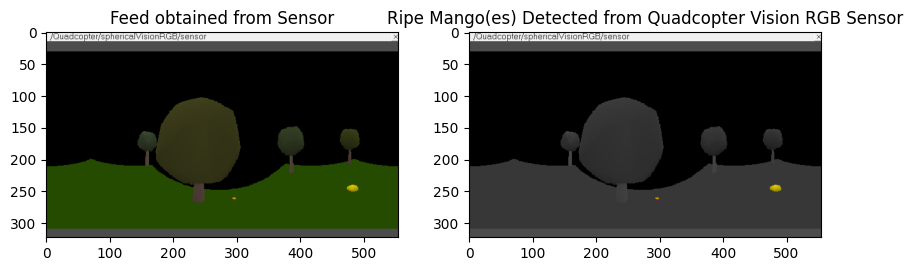

In [ ]:
process_image('sample-orchard.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


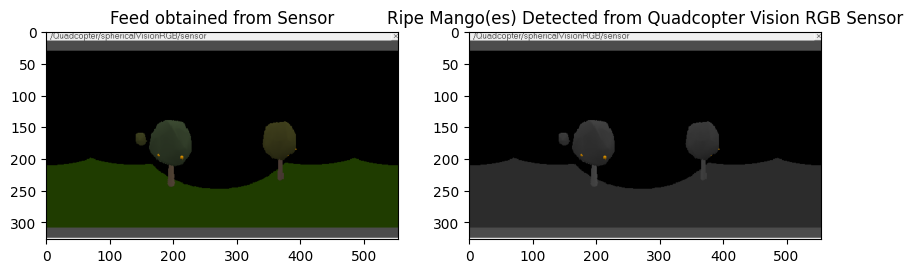

In [ ]:
process_image('scene-1.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


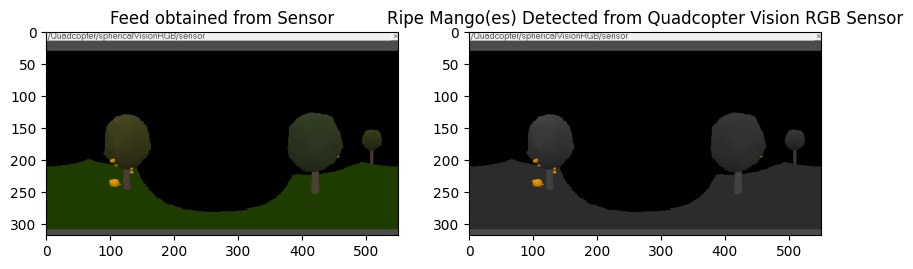

In [ ]:
process_image('scene-2.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


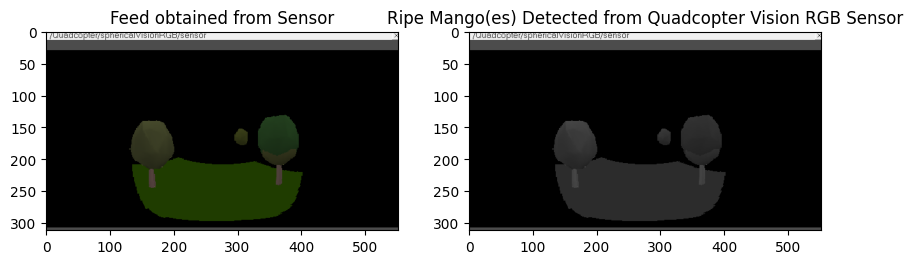

In [ ]:
process_image('scene-3.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


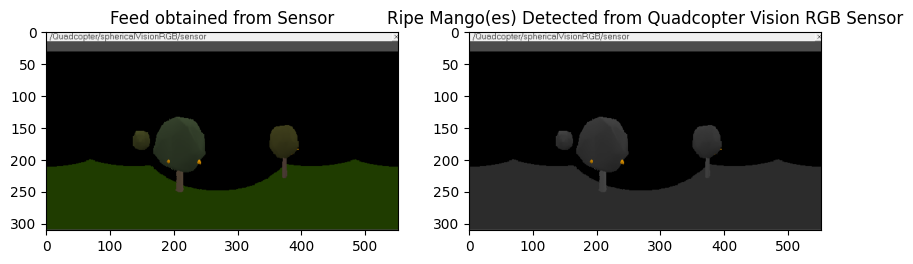

In [ ]:
process_image('scene-4.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


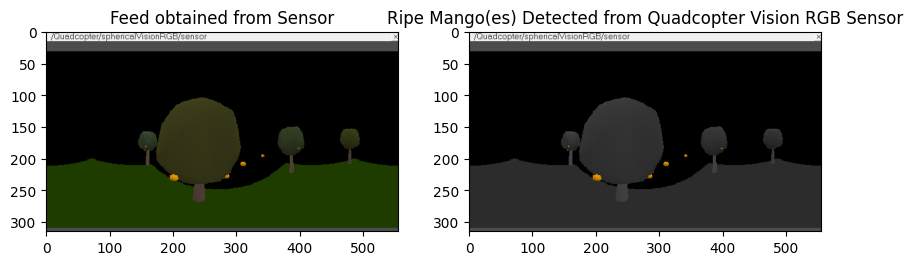

In [ ]:
process_image('scene-5.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


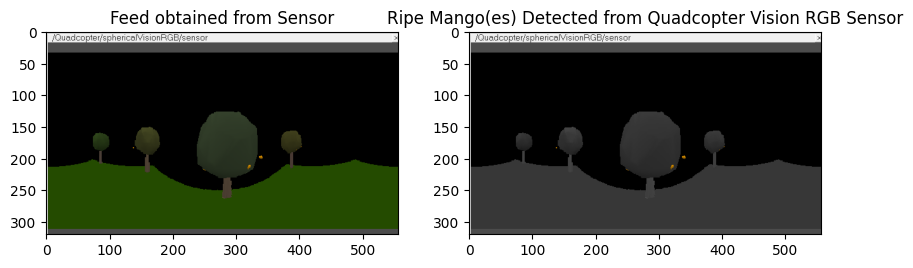

In [ ]:
process_image('scene-6.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


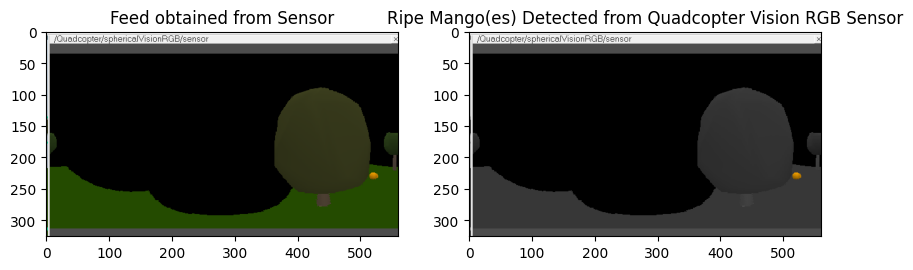

In [ ]:
process_image('scene-7.png')